# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


<div class="alert alert-primary">
<h4>Exercise 3A. The friendship paradox in BA networks</h4>

- Pick a node at random (e.g. use random.choice). Find its degree.
- Find *i*'s neighbors. And calculate their average degree.
- Compare the two numbers to check if *i*'s true that it's friends (on average) have more friends than *i*.
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?
</div>

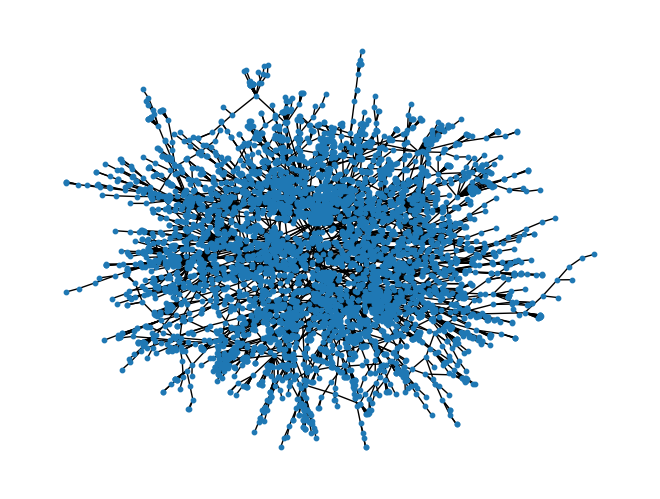

In [17]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph consisting of a single link
F_BA = nx.Graph()
F_BA.add_edge(0, 1)

# Add another node, connecting one of the existing nodes in proportion to their degree
F_BA.add_edge(1, 2) 

# Add until 5000 nodes and connect them to existing nodes in proportion to their degree
for i in range(2, 5000):
    nodes = list(F_BA.nodes())
    # Generate a list of edges
    edges = list(F_BA.edges())
    # Flatten the list of edges
    flat_edges = [node for edge in edges for node in edge]
    # Choose a node to connect to based on its degree
    chosen_node = random.choice(flat_edges)
    # Add the new node and connect it to the chosen node
    F_BA.add_edge(i, chosen_node)

# Plot the network
nx.draw(F_BA, node_size=10, with_labels=False)
plt.show()

In [18]:
# Pick a node i at random and find its degree
node = random.choice(list(F_BA.nodes()))
degree = F_BA.degree(node)
print(f"Degree of node {node}: {degree}")

# Find it's neighbors and calculate their average degree
neighbors = list(F_BA.neighbors(node))
neighbor_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
print(f"Average degree of neighbors: {avg_neighbor_degree}")

# Compare the 2 numbers to check if its true that its friends (on average) have more friends than i
if avg_neighbor_degree > degree:
    print("It's true that its friends have more friends than i.")

Degree of node 2033: 1
Average degree of neighbors: 162.0
It's true that its friends have more friends than i.



After running multiple times the above cell, we can deduce that, in the majority of cases, the neighbors possess a greater average number of friends than node i.

In [19]:
# Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?
count = 0
num_trials = 1000

for _ in range(num_trials):
    node = random.choice(list(F_BA.nodes()))
    degree = F_BA.degree(node)
    neighbors = list(F_BA.neighbors(node))
    neighbor_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    
    if avg_neighbor_degree > degree:
        count += 1

print(f"Friendship paradox is valid in {count} out of {num_trials} trials.")

fraction = count / num_trials
print(f"Friendship Paradox holds true in {fraction * 100:.2f}% of instances.")

Friendship paradox is valid in 864 out of 1000 trials.
Friendship Paradox holds true in 86.40% of instances.


<div class="alert alert-primary">
<h4>Exercise 3B. The friendship paradox more generally</h4>

What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
- First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?
</div>

When the power-law distribution has a flatter slope (smaller 𝛾), the degree distribution becomes more spread out, with more nodes having higher numbers of connections. Consequently, high-degree nodes, or hubs, become more frequent compared to a steeper distribution, where such nodes are less common. As a result, hubs play a larger role in the network when 𝛾 is smaller.

- With a steeper power law (large 𝛾), there are fewer hubs, so while the Friendship Paradox can still hold, it might not be as pronounced. Most people tend to have a small circle of friends, and only a few highly connected hubs distort the average number of friends that those friends possess.

- With a flatter power law (smaller 𝛾), there are more hubs, and these hubs are more likely to be part of people's friendship networks. With a bigger number of hubs, the average number of friends that a person's friends have increases. Therefore, the probability of the paradox being true increases, since individuals are more often linked to popular people who have a greater number of friends compared to the average.

In [20]:
import numpy as np

# Parameters
gamma = 2
n = 5000
xmin = 1

# Generate a power-law degree sequence using the transformation method
def generate_power_law_sequence(n, gamma, xmin):
    # Generate a random sample from the power-law distribution
    r = np.random.uniform(0, 1, n)
    degree_sequence = xmin * (1 - r) ** (-1 / (gamma - 1))
    
    # Round the degrees to the nearest integer
    degree_sequence = np.round(degree_sequence).astype(int)
    
    # Ensure the sum of degrees is even
    if np.sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1
    
    return degree_sequence

degree_sequence = generate_power_law_sequence(n, gamma, xmin)

# Generate a graph from the degree sequence
F_BA2 = nx.configuration_model(degree_sequence)

# Remove parallel edges and self-loops
F_BA2 = nx.Graph(F_BA2)
F_BA2.remove_edges_from(nx.selfloop_edges(F_BA2))

In [21]:
# Check the friendship paradox
count = 0

for _ in range(n):
    node = random.choice(list(F_BA2.nodes()))
    degree = F_BA2.degree(node)
    neighbors = list(F_BA2.neighbors(node))
    neighbor_degrees = [F_BA2.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    
    if avg_neighbor_degree > degree:
        count += 1

fraction = count / F_BA2.number_of_nodes()

print(f"Friendship paradox is valid in {count} out of {n} nodes.")
print(f"Friendship Paradox holds true in {fraction * 100:.2f}% of instances.")

Friendship paradox is valid in 4924 out of 5000 nodes.
Friendship Paradox holds true in 98.48% of instances.


What we stated before is correct according to these results. 
With a flatter power law the number of times the paradox holds true is around 98%.

<div class="alert alert-primary">
<h4>Exercise 3C. The friendship paradox and the configuration model</h4>

- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
- What fraction of the time is the friendship paradox is true for the **F-CM** network?
- Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
    * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
    * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)
</div>

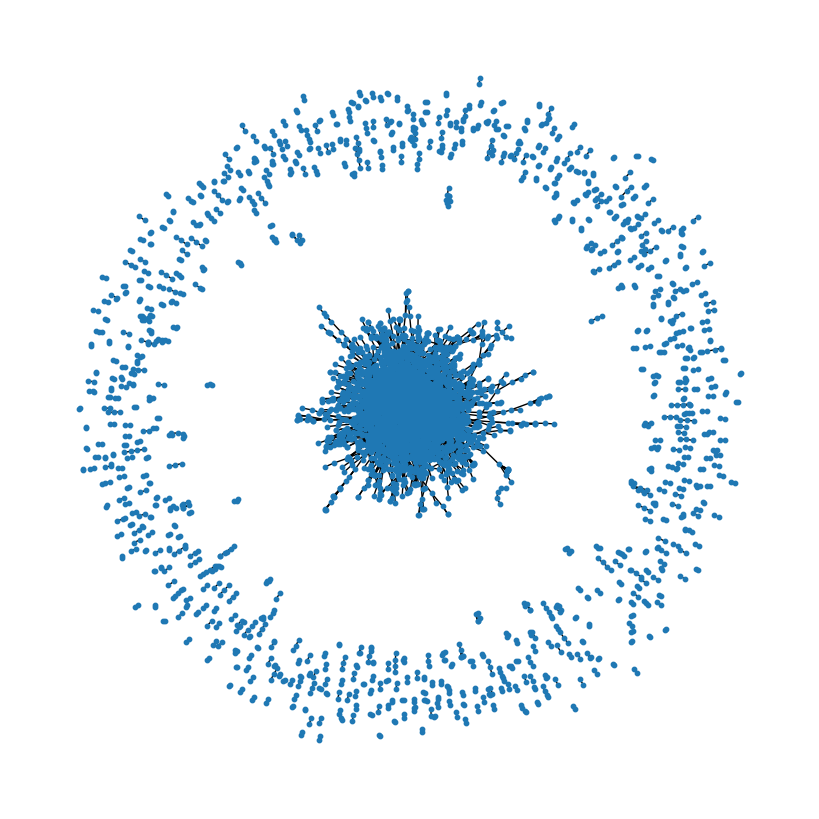

In [22]:
# Generate a network for the configuration model that has the same slope and number of nodes as F_BA in exercise 3A

# Extract the degree sequence from the F_BA model
degree_sequence = [degree for node, degree in F_BA.degree()]

# Generate F-CM using the same degree sequence
F_CM = nx.configuration_model(degree_sequence)

# Convert multigraph to a simple graph
F_CM = nx.Graph(F_CM)  # Removes parallel edges
F_CM.remove_edges_from(nx.selfloop_edges(F_CM))  # Removes self-loops

# Plot the Configuration Model network (F-CM)
plt.figure(figsize=(8, 8))
nx.draw(F_CM, node_size=10, with_labels=False)
plt.show()

In [46]:
 # Check the friendship paradox F_CM
count = 0

for _ in range(n):
    node = random.choice(list(F_CM.nodes()))
    degree = F_CM.degree(node)
    neighbors = list(F_CM.neighbors(node))
    neighbor_degrees = [F_CM.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    
    if avg_neighbor_degree > degree:
        count += 1

fraction = count / F_CM.number_of_nodes()

print(f"Friendship paradox in F-CM is valid in {count} out of {n} nodes.")
print(f"Friendship Paradox in F-CM holds true in {fraction * 100:.2f}% of instances.")

Friendship paradox in F-CM is valid in 3238 out of 5000 nodes.
Friendship Paradox in F-CM holds true in 64.76% of instances.


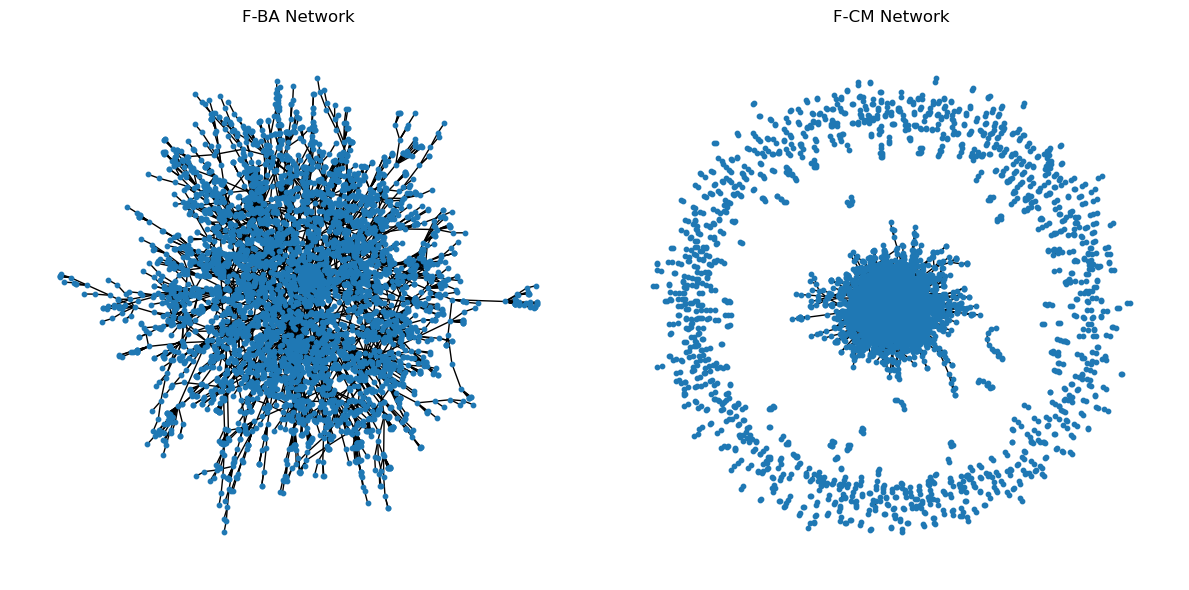

In [24]:
# Plot both networks
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(F_BA, with_labels=False, node_size=10)
plt.title('F-BA Network')

plt.subplot(122)
nx.draw(F_CM, with_labels=False, node_size=10)
plt.title('F-CM Network')

plt.tight_layout()
plt.show()

While both the F-BA and F-CM networks have the same degree distribution, other factors can significantly impact the frequency of the Friendship Paradox:

- Assortativity:
    - F-BA Network: Barabási-Albert networks are typically disassortative, which means hubs are more likely to connect with low-degree nodes. This enhances the friendship paradox because hubs have many connections, rising the average degree of friends.
    - F-CM Network: Configuration models can be designed to have any assortativity. If the F-CM network is assortative, nodes are more likely to connect with others of similar degree, which can reduce the impact of the friendship paradox.
- Clustering Coefficient:
    - F-BA Network: These networks tend to have lower clustering coefficients because new nodes preferentially attach to existing hubs, creating fewer triangles. Lower clustering can lead to a more pronounced friendship paradox.
    - F-CM Network: The clustering coefficient can vary, but if it is higher, nodes are more likely to form tightly-knit groups. Higher clustering can mitigate the friendship paradox because friends of a node are more likely to be friends with each other, balancing the average degree.
- Community Structure:
    - F-BA Network: The presence of hubs creates a hierarchical structure with central nodes connecting different parts of the network. This structure can amplify the friendship paradox as central nodes have significantly higher degrees.
    - F-CM Network: The community structure can be more uniform, with no clear hubs. This uniformity can reduce the friendship paradox as the degree distribution within communities is more balanced.
- Path Length and Diameter:
    - F-BA Network: The presence of hubs reduces the average path length and diameter, making the network more connected. Shorter paths can enhance the friendship paradox because hubs are easily reachable.
    - F-CM Network: The path length and diameter can be longer, especially if the network is more uniformly connected. Longer paths can reduce the friendship paradox as the influence of hubs is less pronounced.


References:
* https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0190-8
* https://academic.oup.com/comnet/article/9/2/cnab011/6287259



In [43]:
# Degree assortativity
degree_assortativity_BA = nx.degree_assortativity_coefficient(F_BA)
print(f"Degree Assortativity F-BA: {degree_assortativity_BA}")
degree_assortativity_CM = nx.degree_assortativity_coefficient(F_CM)
print(f"Degree Assortativity F-CM: {degree_assortativity_CM}")

# Clustering coefficient
clustering_coefficient_BA = nx.average_clustering(F_BA)
print(f"Clustering Coefficient F-BA: {clustering_coefficient_BA}")
clustering_coefficient_CM = nx.average_clustering(F_CM)
print(f"Clustering Coefficient F-CM: {clustering_coefficient_CM}")


# Average shortest path length
average_shortest_path_length_BA = nx.average_shortest_path_length(F_BA)
print(f"Average Shortest Path Length F-BA: {average_shortest_path_length_BA}")
try:
    average_shortest_path_length_CM = nx.average_shortest_path_length(F_CM)
except nx.NetworkXError:
    print("Graph F-CM is not connected.")

# Diameter
diameter_BA = nx.diameter(F_BA)
print(f"Diameter F-BA: {diameter_BA}")
try:
    diameter_CM = nx.diameter(F_CM) 
except nx.NetworkXError:
    print("Graph F-CM is not connected.")


Degree Assortativity F-BA: -0.05826151954098373
Degree Assortativity F-CM: -0.02758135074787694
Clustering Coefficient F-BA: 0.0
Clustering Coefficient F-CM: 0.002102406347496296
Average Shortest Path Length F-BA: 8.33537027405481
Graph F-CM is not connected.
Diameter F-BA: 23
Graph F-CM is not connected.


In disconnected networks, the friendship paradox will be more localized within each separate group. In smaller groups, people are more likely to have friends who share similar numbers of connections.

On the other hand, in a network where everyone is connected, the presence of hubs can greatly affect the average number of friends someone has. However, in disconnected networks, the effect of these hubs is limited to their own groups, potentially reducing the overall impact of the friendship paradox.

To conduct a more thorough examination of whether the friendship paradox applies similarly to F-BA and F-CM networks, we could perform multiple simulations aimed at collecting data on the friendship paradox for both network types. This approach would help ensure that the findings are reliable and due to reandom chance. By doing so, we would gather a distribution reflecting the percentage of nodes for which the friendship paradox is valid. After that, we could employ statistical analyses to compare the distributions of these percentages across the two networks.

In [48]:
def check_friendship_paradox(G, n):
    count = 0
    for _ in range(n):
        node = random.choice(list(G.nodes()))
        degree = G.degree(node)
        neighbors = list(G.neighbors(node))
        if neighbors:
            neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
            avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
            if avg_neighbor_degree > degree:
                count += 1
    return count / G.number_of_nodes()

# Parameters
num_simulations = 100
n = 1000  # Number of nodes to sample in each simulation

# Run simulations
results_BA = [check_friendship_paradox(F_BA, n) for _ in range(num_simulations)]
results_CM = [check_friendship_paradox(F_CM, n) for _ in range(num_simulations)]

# Convert to numpy arrays for easier analysis
results_BA = np.array(results_BA)
results_CM = np.array(results_CM)

In [51]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(results_BA, results_CM)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = 104.49449441644025, p-value = 3.7464390578101223e-175


The T-test shows extremely low p-value, indicating that the friendship paradox holds true significantly more often in the F-BA network compared to the F-CM network. This means that the observed differences in the fraction of nodes experiencing the friendship paradox between the two network types are not due to random chance.

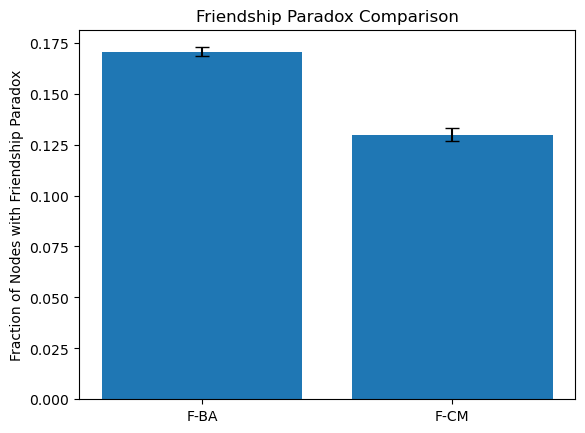

In [50]:
# Calculate means and standard deviations
mean_BA = np.mean(results_BA)
std_BA = np.std(results_BA)
mean_CM = np.mean(results_CM)
std_CM = np.std(results_CM)

# Plot results with error bars
labels = ['F-BA', 'F-CM']
means = [mean_BA, mean_CM]
stds = [std_BA, std_CM]

plt.bar(labels, means, yerr=stds, capsize=5)
plt.ylabel('Fraction of Nodes with Friendship Paradox')
plt.title('Friendship Paradox Comparison')
plt.show()


As shown in the plot above, the mean and standard deviation (std) are used to represent the results of the tests. The error bars illustrate the variability in the fraction of nodes experiencing the friendship paradox across multiple simulations.

<div class="alert alert-primary">
<h4>Exercise 3D. Growth without preferential attachment</h4>

Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success

1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
2. Generate an ER network of same number of nodes and links as the Sune-network. 
    * What are the differences between the ER network and the Sune-network? Explain in your own words. 
    * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.
</div>

In [56]:
## Sune-Network
n = 5000

# Create a graph consisting of a single link
Sune_net = nx.Graph()
Sune_net.add_edge(0, 1)

# Add nodes until reaching 5000 nodes
for i in range(2, n):
    # Choose a random existing node to connect to
    existing_nodes = list(Sune_net.nodes())
    chosen_node = random.choice(existing_nodes)
    
    # Add the new node and connect it to the chosen existing node
    Sune_net.add_edge(i, chosen_node)

In [74]:
## ER-Network
# Calculate the number of edges in the Sune-network
m = Sune_net.number_of_edges()

# Calculate the probability p for the ER network E = p*n*(n-1)/2
p = (2 * m) / (n * (n - 1))

# Generate an ER network with the same number of nodes and approximately the same number of edges
ER_net = nx.erdos_renyi_graph(n, p)

In [84]:
print(f'The probability p for the ER network is {p:.4f}')

The probability p for the ER network is 0.0004


In [75]:
print(f"Number of nodes in Sune network: {Sune_net.number_of_nodes()}")
print(f"Number of nodes in ER network: {ER_net.number_of_nodes()}")

print(f"Number of edges in Sune network: {Sune_net.number_of_edges()}")
print(f"Number of edges in ER network: {ER_net.number_of_edges()}")

Number of nodes in Sune network: 5000
Number of nodes in ER network: 5000
Number of edges in Sune network: 4999
Number of edges in ER network: 5011


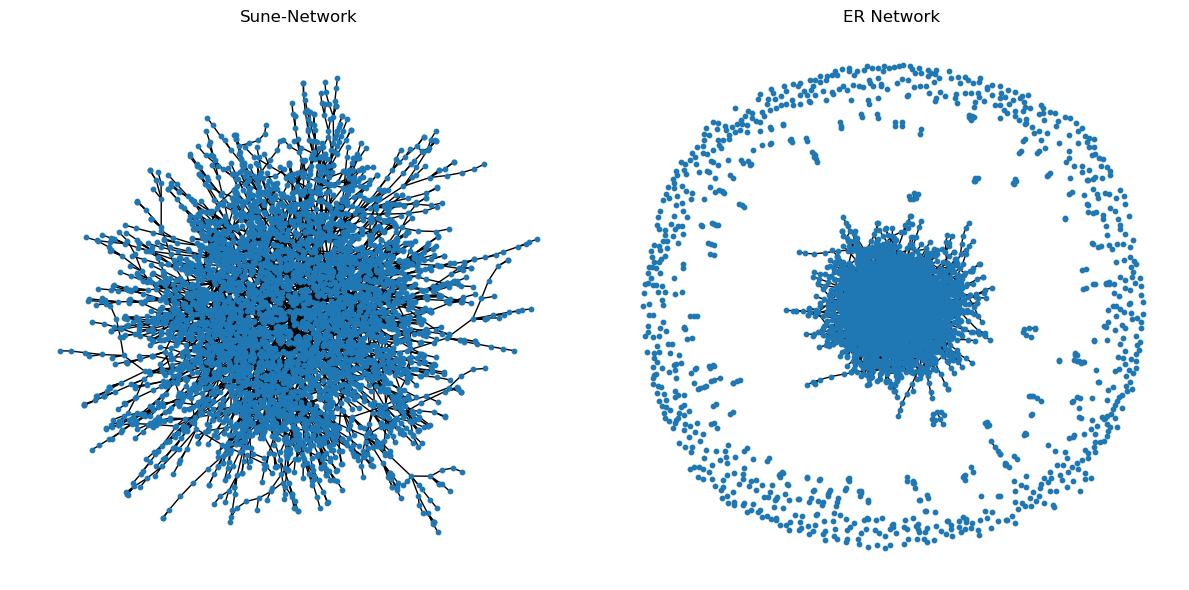

In [76]:
# Plot both networks
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(Sune_net, with_labels=False, node_size=10)
plt.title('Sune-Network')

plt.subplot(122)
nx.draw(ER_net, with_labels=False, node_size=10)
plt.title('ER Network')

plt.tight_layout()
plt.show()

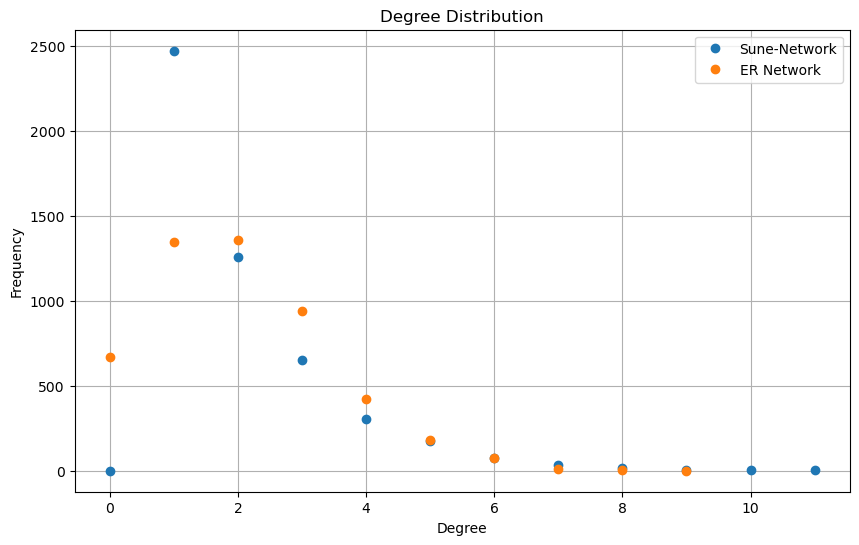

In [79]:
# Plot the two degree distribution. Compare and contrast. 

# Calculate the degree distribution of the Sune-Network
degrees_Sune  = [degree for node, degree in Sune_net.degree()]
degree_hist_Sune = np.histogram(degrees_Sune , bins=range(max(degrees_Sune ) + 2))

# Calculate the degree distribution of the ER network
degrees_ER  = [degree for node, degree in ER_net.degree()]
degree_hist_ER = np.histogram(degrees_ER , bins=range(max(degrees_ER ) + 2))

# Plot the degree distributions
plt.figure(figsize=(10, 6))

plt.plot(degree_hist_Sune[1][:-1], degree_hist_Sune[0], 'o', label='Sune-Network')
plt.plot(degree_hist_ER[1][:-1], degree_hist_ER[0], 'o', label='ER Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid()

plt.show()


In [83]:
# Calculate the number of connected components in the Sune-Network
num_components_Sune = nx.number_connected_components(Sune_net)
print(f"Number of connected components in Sune-Network: {num_components_Sune}")

# Calculate the number of connected components in the ER-Network
num_components_ER = nx.number_connected_components(ER_net)
print(f"Number of connected components in ER Network: {num_components_ER}")

Number of connected components in Sune-Network: 1
Number of connected components in ER Network: 793


Degree Distribution
- Sune-Network: The degree distribution shows that most nodes have a degree of 1, meaning they are linked to only one other node. This results in a pronounced peak at degree 1, with significantly lower frequencies for higher degrees. Such a pattern can lead to a power-law distribution, which is common in many real-world networks.
- ER Network: The degree distribution is more spread out, with nodes having a variety of degrees.
Typically, ER networks show either a binomial or Poisson distribution (as in this case), depending on the network's size and connection probability. This results in a more uniform distribution of node degrees.

Connected Components
- Sune-Network: This network has only one connected component, meaning all nodes are part of a single, large cluster. This is expected since each new node is connected to an existing node, ensuring that the network remains connected.
- ER Network: In contrast, the ER Network has 793 connected components. This indicates that many nodes are isolated or form small clusters, which is typical for random networks with a low probability of connection between nodes.

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

Code needed to download and create the directed network of artists on Wikipedia 

In [1]:
import re

# Read in the text file (assuming it's cleaned up and saved locally)
with open('wiki.txt', 'r', encoding='utf-8') as file:
    content = file.read()

# Regular expression to match all links
links = re.findall(r'\[\[(.*?)\]\]', content)

# Clean up and process links (handle pipes for display text)
artists = []
for link in links:
    # If there's a pipe, the first part is the link, the second part is the display text
    if '|' in link:
        artists.append(link.split('|')[0])
    else:
        artists.append(link)

print(f'Total number of artists: {len(artists)}')

Total number of artists: 2100


In [2]:
import requests
import os

# Base URL for Wikipedia API
BASE_API_URL = "https://en.wikipedia.org/w/api.php"

# Directory to save text files
SAVE_DIR = "country_artists_wiki"

# Ensure the directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

def fetch_wikitext(page_title):
    """Fetch the wikitext of a Wikipedia page."""
    params = {
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "revisions",
        "rvprop": "content",
        "formatversion": "2",
    }
    response = requests.get(BASE_API_URL, params=params)
    data = response.json()
    pages = data.get("query", {}).get("pages", [])
    
    if pages and "revisions" in pages[0]:
        return pages[0]["revisions"][0]["content"]
    return None

def save_wikitext(artist, wikitext):
    """Save the wikitext to a file."""
    # Replace spaces and invalid characters with underscores for file names
    safe_artist = re.sub(r'[\\/*?:"<>|]', "_", artist)
    filename = os.path.join(SAVE_DIR, f"{safe_artist.replace(' ', '_')}.txt")
    with open(filename, "w", encoding="utf-8") as file:
        file.write(wikitext)

# Iterate through the list of artists and download their Wikipedia page wikitext
for artist in artists:
    wikitext = fetch_wikitext(artist)
    
    if wikitext:
        save_wikitext(artist, wikitext)
    else:
        print(f"Wikitext for {artist} not found or page is missing.")

print("Done fetching all wikitexts.")

Done fetching all wikitexts.


In [15]:
import os
import re
import networkx as nx
import matplotlib.pyplot as plt

# Directory containing Wikipedia pages
SAVE_DIR = "country_artists_wiki"

# Sample list of performers (This should be replaced with the complete list)
performers = [file.replace('_', ' ').replace('.txt', '') for file in os.listdir(SAVE_DIR) if file.endswith('.txt')]

# Initialize the directed graph
G = nx.DiGraph()

# Helper function to count words in the page content
def count_words(content):
    words = re.findall(r'\b\w+\b', content)
    return len(words)

# Function to extract valid links pointing to other performers
def extract_links(wikitext, performers):
    # Regular expression to find all Wikipedia links
    links = re.findall(r'\[\[(.*?)(?:\|(.*?))?\]\]', wikitext)
    valid_links = []
    
    for link, display_text in links:
        # Clean the link, replace underscores with spaces, and match against performers
        clean_link = link.replace('_', ' ').strip()
        if clean_link in performers:
            valid_links.append(clean_link)
    
    return valid_links

# Process all performer pages in the directory
for performer_file in os.listdir(SAVE_DIR):
    if performer_file.endswith('.txt'):
        performer_name = performer_file.replace('_', ' ').replace('.txt', '')
        
        # Open and read the wikitext for this performer
        with open(os.path.join(SAVE_DIR, performer_file), 'r', encoding='utf-8') as f:
            wikitext = f.read()
        
        # Extract links to other performers
        linked_performers = extract_links(wikitext, performers)
        
        # Count the number of words in the page content
        word_count = count_words(wikitext)
        
        # Add the node to the graph with the word count as an attribute
        G.add_node(performer_name, word_count=word_count)
        
        # Add directed edges from this performer to the performers they link to
        for linked_performer in linked_performers:
            G.add_edge(performer_name, linked_performer)

# Output the total number of nodes and edges
print(f"Total performers (nodes): {G.number_of_nodes()}")
print(f"Total links (edges): {G.number_of_edges()}")

Total performers (nodes): 2098
Total links (edges): 17672


Removing 146 disconnected nodes.
Artists with no links:
8 Ball Aitken
Adam Craig (singer-songwriter)
Annie Bosko
Arty Hill
Ashley Robertson (singer)
Baillie & The Boys
Billy  Crash  Craddock
Bill 'Cowboy Rambler' Boyd
Blake Reid
Blake Wise
Bobby Cash (singer)
Bobby G. Rice
Bobby Lewis (country singer)
Brent Parlane
Brown & Gray
C.W. McCall
Calvin Wiggett
Caroline Jones (singer)
Cee Cee Chapman
Chasin' Crazy
Chuck Wagon & the Wheels
Cleve Francis
Coffey Anderson
Coldwater Jane
Cole Deggs & The Lonesome
Colt Prather
Crawford West
Dasha (singer)
Dean Tuftin
Debby Ryan
Dick Feller
Donovan Chapman
Dori Freeman
Elisa Lindström
Elise Davis
Elvie Shane
Ennis Sisters
Folk Soul Revival
Gay Kayler
Gear Daddies
Girls Next Door (band)
Griffin Layne
Harry McClintock
Herb Jeffreys
Homer & Jethro
Hometown News
Houston County (band)
J. C. Jones
James & Michael Younger
James Carter and the Prisoners
James T. Horn
Jason Cassidy
Jason Jones (country singer)
Jason Meadows
Jennifer Day
Jerry Jaye
Jessica Ro

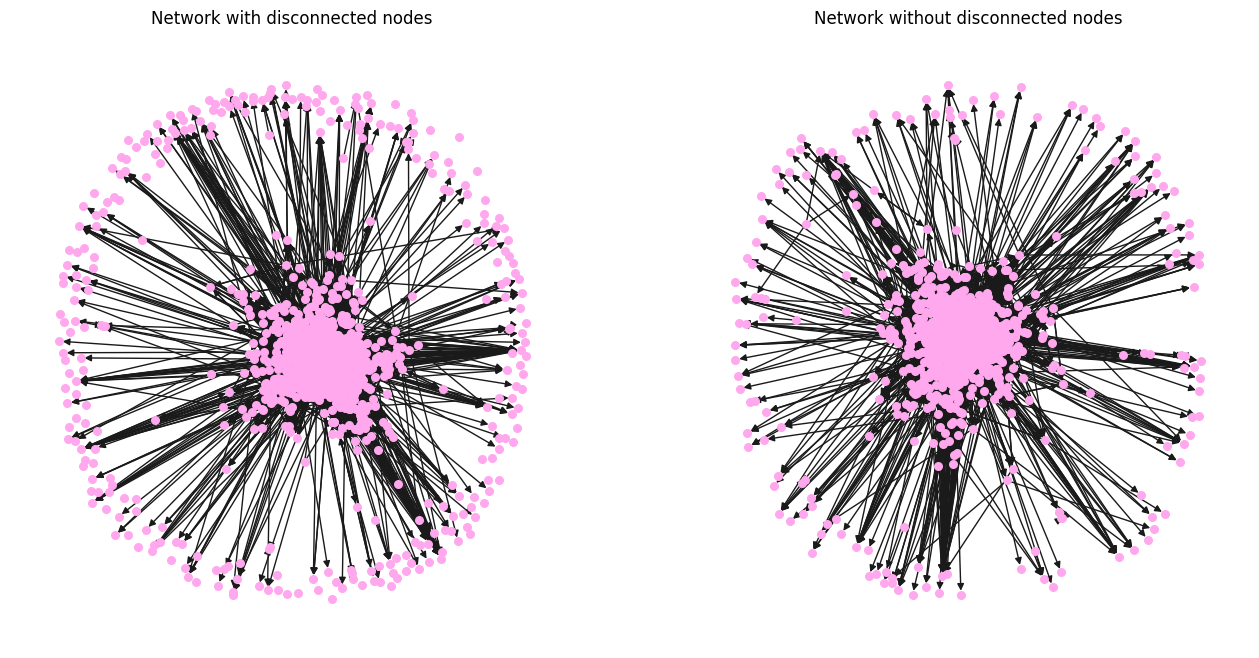

In [16]:
# Remove disconnected nodes
G_copy = G.copy()
disconnected_nodes = [node for node in G.nodes if G.degree(node) == 0]
print(f"Removing {len(disconnected_nodes)} disconnected nodes.")

# Print the artists with no links
print("Artists with no links:")
for node in disconnected_nodes:
    print(node)

G.remove_nodes_from(disconnected_nodes)

# Plot the network
pos = nx.spring_layout(G)
pos_aux = nx.spring_layout(G_copy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the network with disconnected nodes
ax1.set_title('Network with disconnected nodes')
nx.draw(G_copy, ax=ax1, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1, pos=pos_aux)

# Plot the network without disconnected nodes
ax2.set_title('Network without disconnected nodes')
nx.draw(G, ax=ax2, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1, pos=pos)

plt.show()

<div class="alert alert-primary">
<h4>Simple network statistics and analysis</h4>

* What is the number of nodes in the network? 
* More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
* Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
    * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
    * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
* Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
* What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?
</div>


In [17]:
print(f"Total performers before cleaning the disconnected nodes is: {G_copy.number_of_nodes()}")
print(f"Total performers after cleaning the disconnected nodes is: {G.number_of_nodes()}")

Total performers before cleaning the disconnected nodes is: 2098
Total performers after cleaning the disconnected nodes is: 1952


In [18]:
print(f"Total links is: {G_copy.number_of_edges()}")

Total links is: 17672


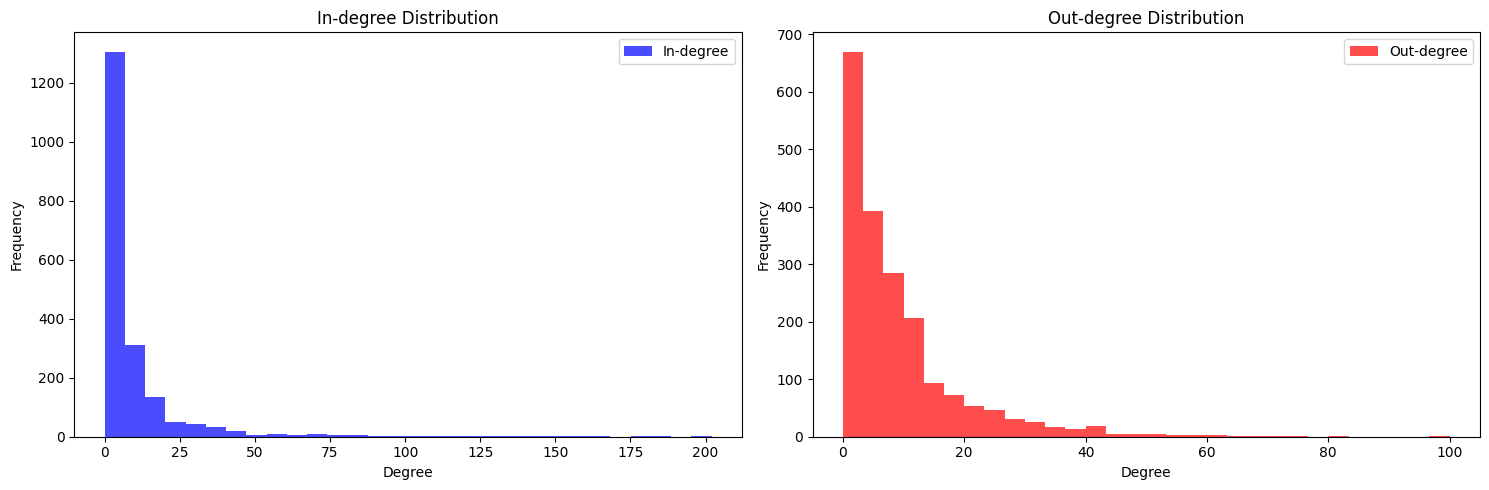

In [19]:
import matplotlib.pyplot as plt

# Get the in-degree and out-degree for each node
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the in-degree distribution as a histogram in the first subplot
ax1.hist(in_degrees, bins=30, color='blue', alpha=0.7, label='In-degree')
ax1.set_title("In-degree Distribution")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")
ax1.legend()

# Plot the out-degree distribution as a histogram in the second subplot
ax2.hist(out_degrees, bins=30, color='red', alpha=0.7, label='Out-degree')
ax2.set_title("Out-degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

From the In-Degree Distribution we can see that most artists have a low in-degree (0-10), and only a few of them have high in-degree (around 200). This suggests that only a small number of artists are referenced frequently by other artists.

Moreover, the ones that have a high in-degree must be highly influential or fmous artists, historical or globally recognized figures.

Looking at the Out-degree Distribution we can see that it has a similar distribution to the graph on the left. Most artists have a small number of outgoing links, what means that the majority if artists on Wikipedia reference only a few other artits, possible those who influenced them, worked with them or are in some way related.

Both distributions make sence since is the typical asymmetry shown in many real-world networks such social media networks.



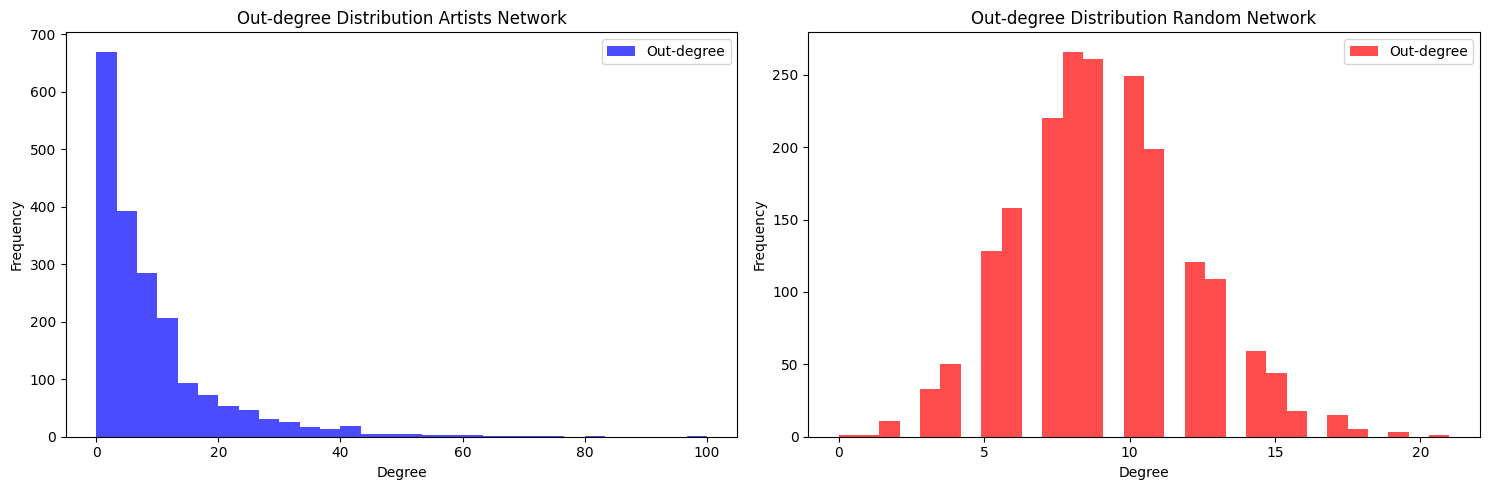

In [23]:
import networkx as nx
import random

# Create an empty graph
R = nx.DiGraph()

# Add 1952 nodes
R.add_nodes_from(range(1952))

# Add 17672 random edges
while R.number_of_edges() < 17672:
    u = random.randint(0, 1951)
    v = random.randint(0, 1951)
    if u != v and not R.has_edge(u, v):
        R.add_edge(u, v)

# Get the in-degree and out-degree for each node
out_degrees_R = [d for n, d in R.out_degree()]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the in-degree distribution as a histogram in the first subplot
ax1.hist(out_degrees, bins=30, color='blue', alpha=0.7, label='Out-degree')
ax1.set_title("Out-degree Distribution Artists Network")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")
ax1.legend()

# Plot the out-degree distribution as a histogram in the second subplot
ax2.hist(out_degrees_R, bins=30, color='red', alpha=0.7, label='Out-degree')
ax2.set_title("Out-degree Distribution Random Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

While in the artist network we can see a real distribution from a network, the random network shows a normal distribution, making it clear that links are distributed into more equal amounts among nodes.

In the artists network the number of outgoing links is likely influenced by historical, cultural and collaborative factors. In contrast, random networks lacks these bias so each node has a equal chance of having a certain number of connections, leading to this symmetric shape.

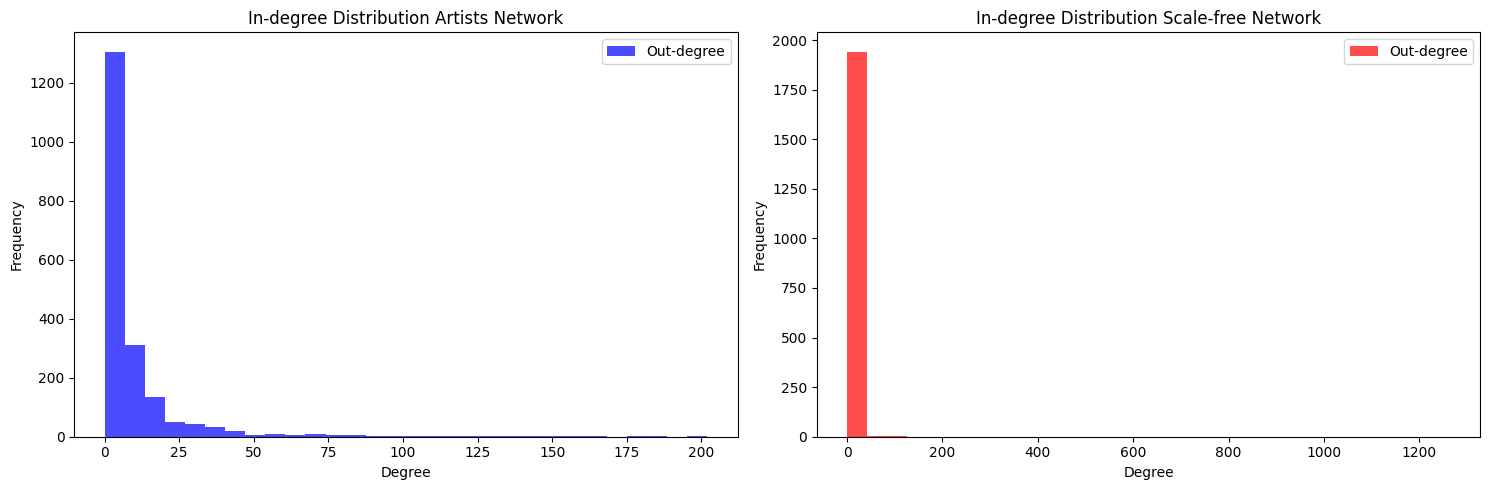

In [27]:
import networkx as nx

# Number of nodes
n = 1952

# Number of edges to attach from a new node to existing nodes
# This parameter is chosen to get approximately 17672 edges
m = 18

# Create a scale-free network using the Barabási-Albert model
S = nx.scale_free_graph(n)

# Get the in-degree and out-degree for each node
in_degrees_S = [d for n, d in S.in_degree()]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the in-degree distribution as a histogram in the first subplot
ax1.hist(in_degrees, bins=30, color='blue', alpha=0.7, label='Out-degree')
ax1.set_title("In-degree Distribution Artists Network")
ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency")
ax1.legend()

# Plot the out-degree distribution as a histogram in the second subplot
ax2.hist(in_degrees_S, bins=30, color='red', alpha=0.7, label='Out-degree')
ax2.set_title("In-degree Distribution Scale-free Network")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Frequency")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

As we can observe in this comparison, The artist network appears to exhibit some scale-free properties. Many real-world networks follow this characteristics since we have a power-law distributin, where a small number of nodes have a very high connectivity while the resy have low connectiviy.

The scale-free network shows a much more extreme version of this distribution, showing that real networks follow this distribution more than the one that random networks have.

In [29]:
# Top 5 performers by in-degree
top_in_degree = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Performers by In-degree:")
for node, degree in top_in_degree:
    print(f"Node: {node}, In-degree: {degree}")


Top 5 Performers by In-degree:
Node: Willie Nelson, In-degree: 202
Node: Johnny Cash, In-degree: 184
Node: Elvis Presley, In-degree: 177
Node: Dolly Parton, In-degree: 162
Node: Merle Haggard, In-degree: 157


In [30]:
# Top 5 performers by out-degree
top_out_degree = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Performers by Out-degree:")
for node, degree in top_out_degree:
    print(f"Node: {node}, Out-degree: {degree}")

Top 5 Performers by Out-degree:
Node: Hillary Lindsey, Out-degree: 100
Node: Pam Tillis, Out-degree: 82
Node: Randy Travis, Out-degree: 75
Node: Vince Gill, Out-degree: 71
Node: Patty Loveless, Out-degree: 68


In [31]:
# Sort nodes by the 'word_count' attribute
top_by_word_count = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]

print("Top 10 Performers by Wikipedia Page Length:")
for performer, attr in top_by_word_count:
    print(f"{performer}: {attr['word_count']} words")

Top 10 Performers by Wikipedia Page Length:
Beyoncé: 62853 words
Taylor Swift: 56355 words
Miley Cyrus: 51262 words
Justin Bieber: 50694 words
Carrie Underwood: 45243 words
Justin Timberlake: 44779 words
Demi Lovato: 44012 words
Bob Dylan: 41141 words
Ed Sheeran: 36312 words
Elvis Presley: 33793 words


<div class="alert alert-primary">
<h4>Let's build a simple visualization of the network</h4>

1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
   * *Note*: Keep the directed graph, we will use it in couple of the following exercises.
2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
   * Set up your plot so that node-size depends on the node *degree*.
   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

</div>


In [33]:
UG = G.to_undirected()

ValueError: Received invalid argument(s): scale

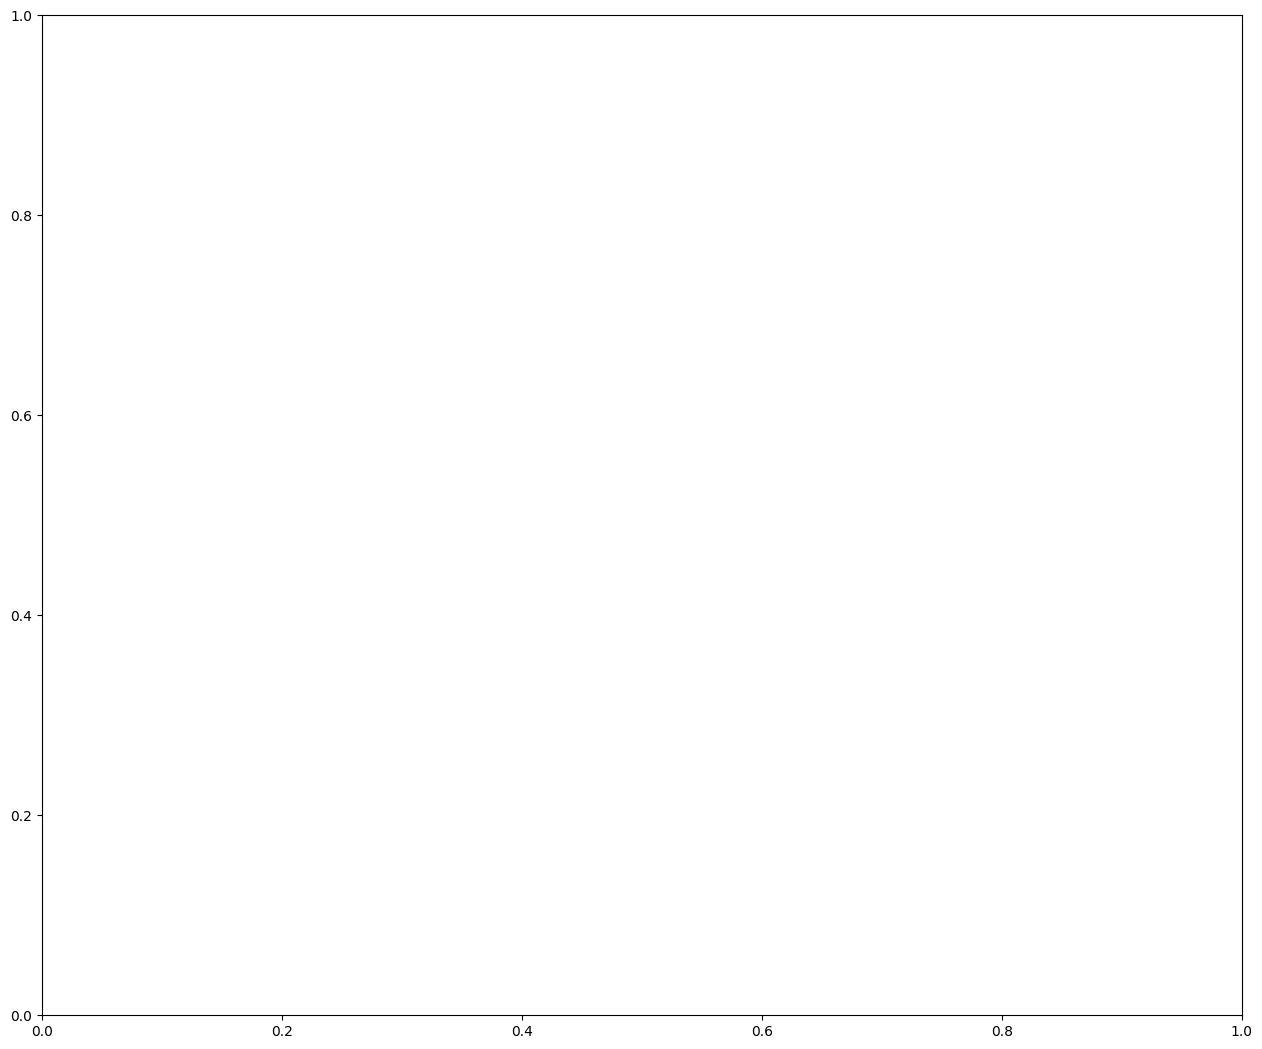

In [44]:
# Calculate node sizes based on degree
node_sizes = [UG.degree(n) * 10 for n in UG.nodes()]

# Calculate node colors based on 'word_count' attribute
node_colors = [UG.nodes[n]['word_count'] for n in UG.nodes()]

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Calculate node sizes based on degree
node_sizes = [UG.degree(n) * 10 for n in UG.nodes()]

# Calculate node colors based on 'word_count' attribute
node_colors = [UG.nodes[n]['word_count'] for n in UG.nodes()]

# Draw the graph using Kamada-Kawai layout without labels
plt.figure(figsize=(12, 10))
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(node_colors)
nx.draw_kamada_kawai(
    UG,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.Blues,
    with_labels=False,  # Do not display node labels
    scale=2  # Adjust the scale to separate nodes more
)

# plt.colorbar(sm, label='Word Count')

plt.show()
